# Titanic

## https://www.kaggle.com/c/titanic

## Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing CSV file I/O
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline

## Read data from csv

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Value Analysis

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. 177 missing values in age
2. 2 rows with missing values in embarked and
3. Nearly all (687) cabin column values being null

In [7]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

1. 86 missing values in age
2. 327 values missing in Cabin

In [8]:
df_train.drop(labels = ['Cabin', 'Ticket'], axis = 1, inplace = True)
df_test.drop(labels = ['Cabin', 'Ticket'], axis = 1, inplace = True)

/Users/architbh/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


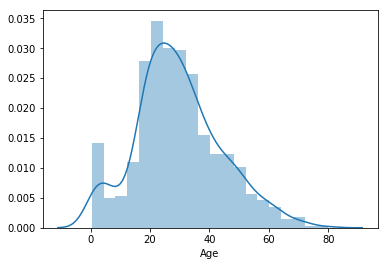

In [9]:
copy = df_train.copy()
copy.dropna(inplace = True)
sb.distplot(copy["Age"])

### We also need to fill in the NaN values with median values in order for the model to have a complete prediction for every row in the data set.

In [10]:
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)
df_test["Age"].fillna(df_test["Age"].median(), inplace = True) 
df_train["Embarked"].fillna("S", inplace = True)
df_test["Fare"].fillna(df_test["Fare"].median(), inplace = True)

## Plotting and Visualizing

### Gender

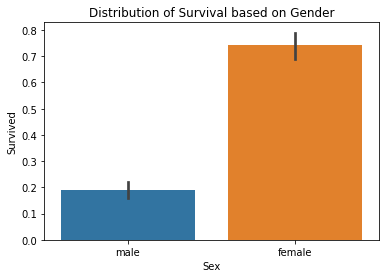

In [11]:
sb.barplot(x="Sex", y="Survived", data=df_train)
plt.title("Distribution of Survival based on Gender")
plt.show()

More data within the above chart

In [12]:
total_survived_females = df_train[df_train['Sex'] == "female"]["Survived"].sum()
total_survived_males = df_train[df_train['Sex'] == "male"]["Survived"].sum()

print("Proportion of Females who survived:") 
print(total_survived_females/float(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/float(total_survived_females + total_survived_males))

Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


Gender appears to be a very good feature to use to predict survival, as shown by the large difference in propotion survived. 

### Class

Text(0.5,1,'Distribution of Survival Based on Class')

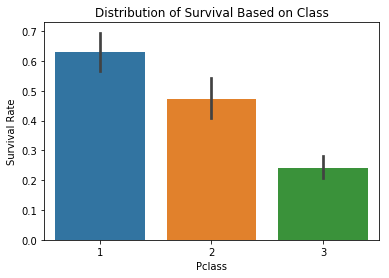

In [13]:
sb.barplot(x="Pclass", y="Survived", data=df_train)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")

Text(0.5,1,'Survival Rates Based on Gender and Class')

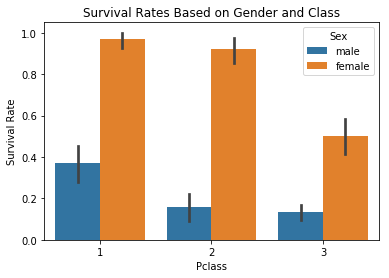

In [14]:
sb.barplot(x="Pclass", y="Survived", hue="Sex", data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5,1,'Survival Rates Based on Gender and Class')

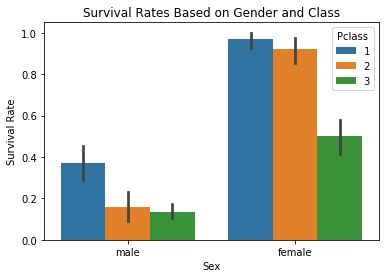

In [15]:
sb.barplot(x="Sex", y="Survived", hue="Pclass", data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

It appears that class also plays a role in survival, as shown by the bar graph. People in Pclass 1 were more likely to survive than people in the other 2 Pclasses.

### Age

/Users/architbh/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/architbh/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


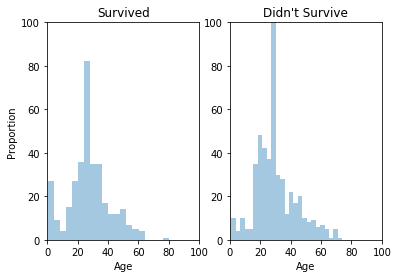

In [16]:
survived_ages = df_train[df_train['Survived'] == 1]["Age"]
not_survived_ages = df_train[df_train['Survived'] == 0]["Age"]
plt.subplot(1, 2, 1)
sb.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sb.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

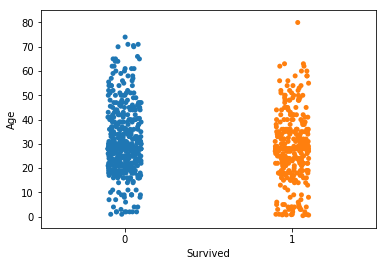

In [17]:
sb.stripplot(x="Survived", y="Age", data=df_train, jitter=True)

It appears as though passengers in the younger range of ages were more likely to survive than those in the older range of ages, as seen by the clustering in the strip plot, as well as the survival distributions of the histogram.

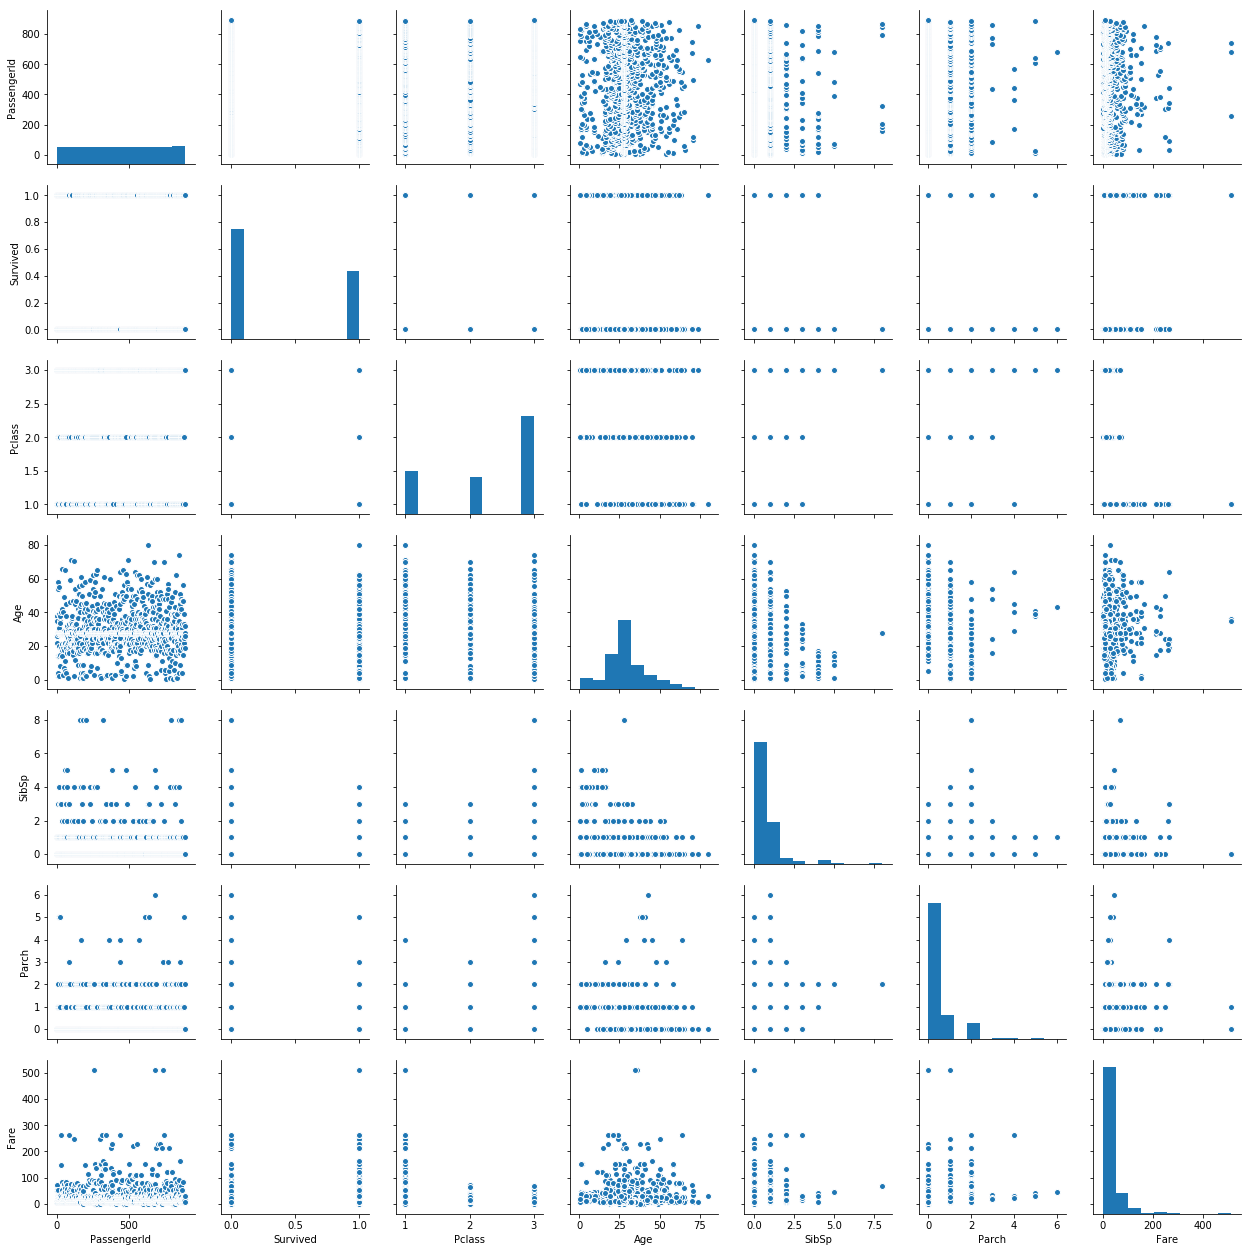

In [18]:
sb.pairplot(df_train)

Here is one final cumulative graph of a pair plot that shows the relations between all of the different features

## Feature Engineering

### Normalizing Features

In [19]:
df_train.loc[df_train['Sex'] == 'male', 'Sex'] = 0
df_train.loc[df_train['Sex'] == 'female', 'Sex'] = 1

df_train.loc[df_train['Embarked'] == 'S', 'Embarked'] = 0
df_train.loc[df_train['Embarked'] == 'C', 'Embarked'] = 1
df_train.loc[df_train['Embarked'] == 'Q', 'Embarked'] = 2

df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 1

df_test.loc[df_test['Embarked'] == 'S', 'Embarked'] = 0
df_test.loc[df_test['Embarked'] == 'C', 'Embarked'] = 1
df_test.loc[df_test['Embarked'] == 'Q', 'Embarked'] = 2

In [20]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",0,20.0,0,0,7.050,0
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",0,28.0,0,0,35.000,0
244,245,0,3,"Attalah, Mr. Sleiman",0,30.0,0,0,7.225,1
841,842,0,2,"Mudd, Mr. Thomas Charles",0,16.0,0,0,10.500,0
289,290,1,3,"Connolly, Miss. Kate",1,22.0,0,0,7.750,2


### We can combine SibSp and Parch into one synthetic feature called family size, which indicates the total number of family members on board for each member.

In [21]:
df_train["FamSize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamSize"] = df_test["SibSp"] + df_test["Parch"] + 1

In [22]:
df_train["IsAlone"] = df_train.FamSize.apply(lambda x: 1 if x == 1 else 0)
df_test["IsAlone"] = df_test.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [23]:
for name in df_train['Name']:
    df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+)\.',expand=True)
    
for name in df_test['Name']:
    df_test['Title'] = df_test['Name'].str.extract('([A-Za-z]+)\.',expand=True)
    
title_replacements = {'Mlle': 'Other', 'Major': 'Other', 'Col': 'Other', 'Sir': 'Other', 'Don': 'Other', 'Mme': 'Other',
          'Jonkheer': 'Other', 'Lady': 'Other', 'Capt': 'Other', 'Countess': 'Other', 'Ms': 'Other', 'Dona': 'Other', 'Rev' : 'Other', 'Dr' : 'Other'}

df_train.replace({'Title': title_replacements}, inplace=True)
df_test.replace({'Title': title_replacements}, inplace=True)

df_train.loc[df_train["Title"] == "Miss", "Title"] = 0
df_train.loc[df_train["Title"] == "Mr", "Title"] = 1
df_train.loc[df_train["Title"] == "Mrs", "Title"] = 2
df_train.loc[df_train["Title"] == "Master", "Title"] = 3
df_train.loc[df_train["Title"] == "Other", "Title"] = 4

df_test.loc[df_test["Title"] == "Miss", "Title"] = 0
df_test.loc[df_test["Title"] == "Mr", "Title"] = 1
df_test.loc[df_test["Title"] == "Mrs", "Title"] = 2
df_test.loc[df_test["Title"] == "Master", "Title"] = 3
df_test.loc[df_test["Title"] == "Other", "Title"] = 4

In [24]:
print(set(df_train["Title"]))

set([0, 1, 2, 3, 4])


In [25]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
311,1203,3,"Vartanian, Mr. David",0,22.0,0,0,7.225,1,1,1,1
103,995,3,"Johansson Palmquist, Mr. Oskar Leander",0,26.0,0,0,7.775,0,1,1,1
302,1194,2,"Phillips, Mr. Escott Robert",0,43.0,0,1,21.000,0,2,0,1
204,1096,2,"Andrew, Mr. Frank Thomas",0,25.0,0,0,10.500,0,1,1,1
145,1037,3,"Vander Planke, Mr. Julius",0,31.0,3,0,18.000,0,4,0,1


## Model Fitting And Predicting

In [26]:
## Library
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score #to evaluate how well model is predicting
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #to create validation data set

In [27]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]
X_train = df_train[features] #define training features set
y_train = df_train["Survived"] #define training label set
X_test = df_test[features] #define testing features set

In [28]:
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

### SVC Model

In [29]:
svc_clf = SVC(kernel="linear", gamma=3) #we can try different parameters
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.7877094972067039


### LinearSVC Model

In [30]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)

0.7653631284916201


### RandomForestModel

In [31]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8324022346368715


### LogisiticRegression Model

In [32]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.7988826815642458


### KNeighbors Model

In [33]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.7430167597765364


### GaussianNB Model

In [34]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.7877094972067039


### DecisionTree Model

In [35]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.776536312849162


### Evaluating Model Performances

In [36]:
model_performance = pd.DataFrame({
    'Model': ['SVC', 'Linear SVC', 'Random Forest', 
              'Logistic Regression', 'K Nearest Neighbors', 'Gaussian Naive Bayes',  
              'Decision Tree'],
    'Accuracy': [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by='Accuracy', ascending=False)

,Accuracy,Model
2,0.832402,Random Forest
3,0.798883,Logistic Regression
0,0.787709,SVC
5,0.787709,Gaussian Naive Bayes
6,0.776536,Decision Tree
1,0.765363,Linear SVC
4,0.743017,K Nearest Neighbors


It appears that the Random Forest model works the best with our data so we will use it on the test set.

In [ ]:
rf_clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(rf_clf, parameters, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

rf_clf = grid_obj.best_estimator_

rf_clf.fit(X_training, y_training)

In [ ]:
predictions = rf_clf.predict(X_valid)
print(accuracy_score(y_valid, predictions))

## Submission

In [ ]:
rf_clf.fit(X_train, y_train)

In [ ]:
submission_predictions = rf_clf.predict(X_test)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)